In [1]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.
import seaborn as sns   # generar visualizaciones de gráficos

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.
from sklearn.metrics import mean_absolute_error, explained_variance_score, max_error


# Deep Learning
import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.

In [2]:
# Cargamos el archivo del repositorio de Github

df_central = pd.read_csv("https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv")

# Eliminamos la columna 'Unnamed: 0' ya que ya tenemos los índices del Dataframe marcados.

df_central.drop(columns=['Unnamed: 0'], inplace=True)

# Convertimos la columna 'Fecha' a Datetime

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Vemos los cambios en las primeras 5 filas

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,0.0,0,0,0,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,0.0,0,0,0,4,False,2021,1,1


c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


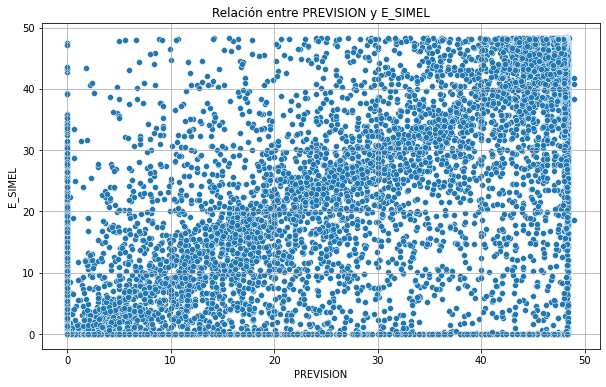

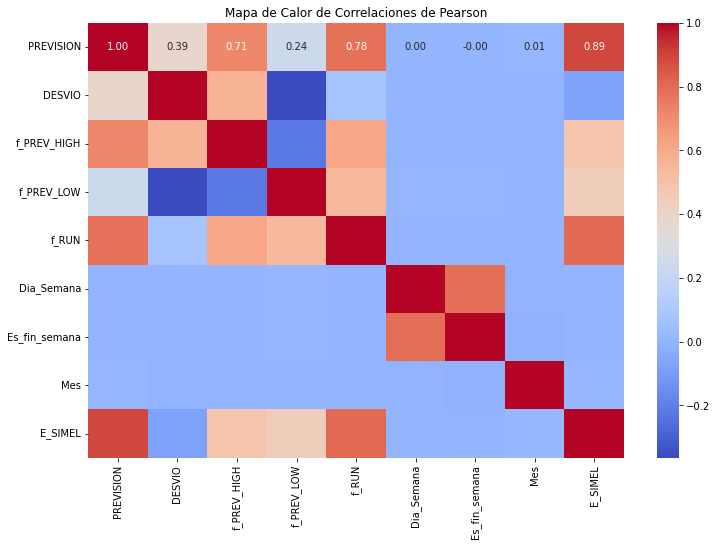

DESVIO          -0.081421
Es_fin_semana   -0.003424
Dia_Semana      -0.000052
Mes              0.016508
f_PREV_LOW       0.435761
f_PREV_HIGH      0.492146
f_RUN            0.803932
PREVISION        0.888352
E_SIMEL          1.000000
Name: E_SIMEL, dtype: float64


In [3]:
# Empezamos con la visualización de la relación de las varibles de que disponemos


# Seleccionamos las variables independientes para análisis

variables_independientes = ['PREVISION', 'DESVIO', 'f_PREV_HIGH', 'f_PREV_LOW', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Mes']

# Calculamos el coeficiente de correlación de Pearson para las variables seleccionadas con respecto a 'E_SIMEL', variable objetivo

correlaciones = df_central[variables_independientes + ['E_SIMEL']].corr()['E_SIMEL'].sort_values()


# Creamos un  gráficos de dispersión para la variable 'PREVISION' (variable que sabemos que tiene más peso) vs 'E_SIMEL'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_central, x='PREVISION', y='E_SIMEL')
plt.title('Relación entre PREVISION y E_SIMEL')
plt.xlabel('PREVISION')
plt.ylabel('E_SIMEL')
plt.grid(True)
plt.show()


# Matriz de correlación de Pearson para las variables seleccionadas y 'E_SIMEL'

matriz_correlaciones = df_central[variables_independientes + ['E_SIMEL']].corr()

# Creamos un mapa de calor para visualizar las correlaciones e imprimimos las correlaciones

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones de Pearson')
plt.show()

print(correlaciones)


In [4]:
""" Retomamos el estudio del modelo de Regresión Lineal y lo haremos con una conjunto de entrenamiento
y prueba diferente a lo habitual cogiendo un 85% para entrenamiento y un 15% para la prueba utilizando
las fechas como linea de corte.

"""

' Retomamos el estudio del modelo de Regresión Lineal y lo haremos con una conjunto de entrenamiento\ny prueba diferente a lo habitual cogiendo un 85% para entrenamiento y un 15% para la prueba utilizando\nlas fechas como linea de corte.\n\n'

In [5]:
# Calculamos la fecha de corte para una división 85-15 basada en el tiempo

total_dias_85_15 = (df_central['Fecha'].max() - df_central['Fecha'].min()).days
corte_dias_85_15 = total_dias_85_15 * 0.85
fecha_corte_85_15 = df_central['Fecha'].min() + pd.Timedelta(days=corte_dias_85_15)

# Dividimos el dataset en entrenamiento y prueba basado en la fecha de corte

df_entrenamiento_85_15 = df_central[df_central['Fecha'] <= fecha_corte_85_15]
df_prueba_85_15 = df_central[df_central['Fecha'] > fecha_corte_85_15]

# Visualizamos el número de datos de cada corte y la fecha de corte de cada conjunto

len_df_entrenamiento_85_15 = len(df_entrenamiento_85_15)
len_df_prueba_85_15 = len(df_prueba_85_15)
fecha_max_entrenamiento_85_15 = df_entrenamiento_85_15['Fecha'].max()
fecha_min_prueba_85_15 = df_prueba_85_15['Fecha'].min()

len_df_entrenamiento_85_15, len_df_prueba_85_15, fecha_max_entrenamiento_85_15, fecha_min_prueba_85_15


(21273,
 3793,
 Timestamp('2023-06-10 00:00:00'),
 Timestamp('2023-06-11 00:00:00'))

In [6]:
# Preparamos los datos para el modelo de regresión lineal

X_train_85_15 = df_entrenamiento_85_15[['PREVISION']]  # Variable independiente para el entrenamiento
y_train_85_15 = df_entrenamiento_85_15['E_SIMEL']      # Variable dependiente/objetivo para el entrenamiento

X_test_85_15 = df_prueba_85_15[['PREVISION']]          # Variable independiente para la prueba
y_test_85_15 = df_prueba_85_15['E_SIMEL']              # Variable dependiente para la prueba


# Creamos y entrenamos el modelo de regresión lineal

modelo_85_15 = LinearRegression()
modelo_85_15.fit(X_train_85_15, y_train_85_15)

# Realizamos las  predicciones en el conjunto de prueba

y_pred_85_15 = modelo_85_15.predict(X_test_85_15)


# Evaluación del modelo con el coeficiente para la variable PREVISIÓN y el intercepto para la variable E_SIMEL,
# además de las métricas mse y r2

mse_85_15 = mean_squared_error(y_test_85_15, y_pred_85_15)
r2_85_15 = r2_score(y_test_85_15, y_pred_85_15)

modelo_85_15.coef_[0], modelo_85_15.intercept_, mse_85_15, r2_85_15


(0.8161717082413648, 0.4560723343705586, 56.85411270876022, 0.8346287013233246)

In [7]:
"""
El resultado del coeficiente para la PREVISION nos indica que por cada unidad que incrementa la PREVISIÓN, se
esperará que la variable E_SIMEL incremente en 0.816 lo que nos demuestra la relación directa entre estas dos variables.
El resultado del intercepto nos indica el valor esperado de la varible E_SIMEL cuando la/las variables independientes,
en este caso PREVISION sean 0. Es un dato interesante y veremos com evolucionan las predicciones.

"""

'\nEl resultado del coeficiente para la PREVISION nos indica que por cada unidad que incrementa la PREVISIÓN, se\nesperará que la variable E_SIMEL incremente en 0.816 lo que nos demuestra la relación directa entre estas dos variables.\nEl resultado del intercepto nos indica el valor esperado de la varible E_SIMEL cuando la/las variables independientes,\nen este caso PREVISION sean 0. Es un dato interesante y veremos com evolucionan las predicciones.\n\n'

In [8]:
"""
Vamos a empezar con el proces de predicciones para las fechas que hemos utilizado en los otros modelos,
que son los datos que tenemos disponibles del mes de noviembre de 2023.

"""

'\nVamos a empezar con el proces de predicciones para las fechas que hemos utilizado en los otros modelos,\nque son los datos que tenemos disponibles del mes de noviembre de 2023.\n\n'

In [9]:
# Filtramos los datos para el día específico que queremos hacer la predicción

datos_dia_especifico_05_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-05']

# Preparamos los datos

X_dia_especifico = datos_dia_especifico_05_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_05_11['E_SIMEL']

# Realizamos la predicción para el día que hemos elegido

y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)

# Añadimos las predicciones al DataFrame para poder hacer la comparación

datos_dia_especifico_05_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico

# Calculamos las  métricas adicionales para estos resultados de la predicción respecto la producción real

mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)

# Mostramos las predicciones junto a los valores reales y las métricas calculadas

resultados_prediccion = datos_dia_especifico_05_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

resultados_prediccion, metricas


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\771202735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_05_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


(           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
 24802 2023-11-05       1        0.0    0.000            0.456072
 24803 2023-11-05       2        0.0    0.000            0.456072
 24804 2023-11-05       3        0.0    0.000            0.456072
 24805 2023-11-05       4        0.0    0.000            0.456072
 24806 2023-11-05       5        0.0    0.000            0.456072
 24807 2023-11-05       6        0.0    0.000            0.456072
 24808 2023-11-05       7        0.0    0.000            0.456072
 24809 2023-11-05       8        0.0    0.000            0.456072
 24810 2023-11-05       9        0.0    0.000            0.456072
 24811 2023-11-05      10        0.0    0.000            0.456072
 24812 2023-11-05      11        0.0    0.000            0.456072
 24813 2023-11-05      12        0.0    0.000            0.456072
 24814 2023-11-05      13        0.0    0.000            0.456072
 24815 2023-11-05      14        0.0    0.000            0.456072
 24816 202

In [10]:
print(datos_dia_especifico_05_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_05_11['E_SIMEL'].sum())
print(datos_dia_especifico_05_11['PREVISION'].sum())

10.945736024893407
15.937000000000001
0.0


In [11]:
"""
Como podemos apreciar en esta primera predicción en que todas las Previsiones son cero, la predicción de E_SIMEL,
tal como nos había indicado del intercepto, da como valor el 0.456072

"""

'\nComo podemos apreciar en esta primera predicción en que todas las Previsiones son cero, la predicción de E_SIMEL,\ntal como nos había indicado del intercepto, da como valor el 0.456072\n\n'

In [12]:
# Vamos repitiendo el mismo proceso de selección del día específico que queremos
# hacer la predicción, preparamos datos, hacemos la predicción, añadimos
# la predicción al Dataframe y calculamos y mostramos los resultados de las predicciones y de las
# métricas.


datos_dia_especifico_06_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-06']


X_dia_especifico = datos_dia_especifico_06_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_06_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_06_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_06_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

resultados_prediccion, metricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\2734104598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_06_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


(           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
 24826 2023-11-06       1        0.0    0.000            0.456072
 24827 2023-11-06       2        0.0    0.000            0.456072
 24828 2023-11-06       3        0.0    0.000            0.456072
 24829 2023-11-06       4        0.0    0.000            0.456072
 24830 2023-11-06       5        0.0    0.000            0.456072
 24831 2023-11-06       6        0.0    0.000            0.456072
 24832 2023-11-06       7        0.0    0.000            0.456072
 24833 2023-11-06       8        0.0    0.000            0.456072
 24834 2023-11-06       9        0.0    0.000            0.456072
 24835 2023-11-06      10        0.0    0.000            0.456072
 24836 2023-11-06      11        2.6    0.000            2.578119
 24837 2023-11-06      12       11.6    0.000            9.923664
 24838 2023-11-06      13       15.8    0.000           13.351585
 24839 2023-11-06      14       19.4    0.000           16.289803
 24840 202

In [13]:
print(datos_dia_especifico_06_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_06_11['E_SIMEL'].sum())
print(datos_dia_especifico_06_11['PREVISION'].sum())

141.04350631856695
58.542
159.4


In [14]:

datos_dia_especifico_07_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-07']


X_dia_especifico = datos_dia_especifico_07_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_07_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_07_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_07_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

resultados_prediccion, metricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\2921243874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_07_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


(           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
 24850 2023-11-07       1        0.0    0.000            0.456072
 24851 2023-11-07       2        0.0    0.000            0.456072
 24852 2023-11-07       3        0.0    0.000            0.456072
 24853 2023-11-07       4        0.0    0.000            0.456072
 24854 2023-11-07       5        0.0    0.000            0.456072
 24855 2023-11-07       6        0.0    0.000            0.456072
 24856 2023-11-07       7        0.0    0.000            0.456072
 24857 2023-11-07       8        0.0    0.000            0.456072
 24858 2023-11-07       9        0.0    0.000            0.456072
 24859 2023-11-07      10        0.0    0.000            0.456072
 24860 2023-11-07      11        0.0   10.356            0.456072
 24861 2023-11-07      12        6.0   21.852            5.353103
 24862 2023-11-07      13        5.0   16.838            4.536931
 24863 2023-11-07      14        0.0   16.598            0.456072
 24864 202

In [15]:
print(datos_dia_especifico_07_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_07_11['E_SIMEL'].sum())
print(datos_dia_especifico_07_11['PREVISION'].sum())

30.533857022686163
67.97999999999999
24.0


In [16]:

datos_dia_especifico_08_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-08']


X_dia_especifico = datos_dia_especifico_08_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_08_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_08_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_08_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

resultados_prediccion, metricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\2408766257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_08_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


(           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
 24874 2023-11-08       1        0.0    0.000            0.456072
 24875 2023-11-08       2        0.0    0.000            0.456072
 24876 2023-11-08       3        0.0    0.000            0.456072
 24877 2023-11-08       4        0.0    0.000            0.456072
 24878 2023-11-08       5        0.0    0.000            0.456072
 24879 2023-11-08       6        0.0    0.000            0.456072
 24880 2023-11-08       7        0.0    0.000            0.456072
 24881 2023-11-08       8        0.0    0.000            0.456072
 24882 2023-11-08       9        0.0    0.000            0.456072
 24883 2023-11-08      10        0.0    0.000            0.456072
 24884 2023-11-08      11        0.0    0.000            0.456072
 24885 2023-11-08      12        0.0    0.000            0.456072
 24886 2023-11-08      13        0.0    0.000            0.456072
 24887 2023-11-08      14        0.0    0.000            0.456072
 24888 202

In [17]:
print(datos_dia_especifico_08_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_08_11['E_SIMEL'].sum())
print(datos_dia_especifico_08_11['PREVISION'].sum())

10.945736024893407
11.296999999999999
0.0


In [18]:

datos_dia_especifico_09_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-09']


X_dia_especifico = datos_dia_especifico_09_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_09_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_09_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_09_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

resultados_prediccion, metricas

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\3247035048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_09_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


(           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
 24898 2023-11-09       1        0.0    0.000            0.456072
 24899 2023-11-09       2        0.0    0.000            0.456072
 24900 2023-11-09       3        0.0    0.000            0.456072
 24901 2023-11-09       4        0.0    0.000            0.456072
 24902 2023-11-09       5        0.0    0.000            0.456072
 24903 2023-11-09       6        0.0    0.000            0.456072
 24904 2023-11-09       7        0.0    0.000            0.456072
 24905 2023-11-09       8        0.0    0.000            0.456072
 24906 2023-11-09       9        0.0    0.000            0.456072
 24907 2023-11-09      10        0.0    0.000            0.456072
 24908 2023-11-09      11        0.0    0.000            0.456072
 24909 2023-11-09      12        0.0    0.000            0.456072
 24910 2023-11-09      13        6.6    0.000            5.842806
 24911 2023-11-09      14       16.8    0.997           14.167757
 24912 202

In [19]:
print(datos_dia_especifico_09_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_09_11['E_SIMEL'].sum())
print(datos_dia_especifico_09_11['PREVISION'].sum())

114.84439448401916
102.43700000000001
127.30000000000001


In [20]:

datos_dia_especifico_10_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-10']


X_dia_especifico = datos_dia_especifico_10_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_10_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_10_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_10_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}

print(resultados_prediccion)
print(metricas)
print(datos_dia_especifico_10_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_10_11['E_SIMEL'].sum())
print(datos_dia_especifico_10_11['PREVISION'].sum())

           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
24922 2023-11-10       1        0.0    0.000            0.456072
24923 2023-11-10       2        0.0    0.000            0.456072
24924 2023-11-10       3        0.0    0.000            0.456072
24925 2023-11-10       4        0.0    0.000            0.456072
24926 2023-11-10       5        0.0    0.000            0.456072
24927 2023-11-10       6        0.0    0.000            0.456072
24928 2023-11-10       7        0.0    0.000            0.456072
24929 2023-11-10       8        0.0    0.000            0.456072
24930 2023-11-10       9        0.0    0.000            0.456072
24931 2023-11-10      10        0.0    0.000            0.456072
24932 2023-11-10      11        9.7    0.000            8.372938
24933 2023-11-10      12       15.7    0.000           13.269968
24934 2023-11-10      13       17.7   10.101           14.902312
24935 2023-11-10      14       18.6   15.793           15.636866
24936 2023-11-10      15 

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\1191571778.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_10_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


In [21]:

datos_dia_especifico_13_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-13']


X_dia_especifico = datos_dia_especifico_13_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_13_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_13_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_13_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}


print(resultados_prediccion)
print(metricas)

print(datos_dia_especifico_13_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_13_11['E_SIMEL'].sum())
print(datos_dia_especifico_13_11['PREVISION'].sum())

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\3611875608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_13_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


           Fecha  Period  PREVISION  E_SIMEL  Prediccion_E_SIMEL
24994 2023-11-13       1        0.0    0.000            0.456072
24995 2023-11-13       2        0.0    0.000            0.456072
24996 2023-11-13       3        0.0    0.000            0.456072
24997 2023-11-13       4        0.0    0.000            0.456072
24998 2023-11-13       5        0.0    0.000            0.456072
24999 2023-11-13       6        0.0    0.000            0.456072
25000 2023-11-13       7        0.0    0.000            0.456072
25001 2023-11-13       8        0.0    0.000            0.456072
25002 2023-11-13       9        0.0    0.000            0.456072
25003 2023-11-13      10        0.0    0.000            0.456072
25004 2023-11-13      11        0.0    0.000            0.456072
25005 2023-11-13      12        0.0    0.000            0.456072
25006 2023-11-13      13        0.0    0.000            0.456072
25007 2023-11-13      14        0.0    7.064            0.456072
25008 2023-11-13      15 

In [22]:

datos_dia_especifico_14_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-14']


X_dia_especifico = datos_dia_especifico_14_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_14_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_14_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_14_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}


print(datos_dia_especifico_14_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_14_11['E_SIMEL'].sum())
print(datos_dia_especifico_14_11['PREVISION'].sum())

109.29442686797786
112.33099999999999
120.5


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\3817676076.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_14_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


In [23]:

datos_dia_especifico_15_11 = df_prueba_85_15[df_prueba_85_15['Fecha'] == '2023-11-15']

X_dia_especifico = datos_dia_especifico_15_11[['PREVISION']]
y_real_dia_especifico = datos_dia_especifico_15_11['E_SIMEL']


y_pred_dia_especifico = modelo_85_15.predict(X_dia_especifico)


datos_dia_especifico_15_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


mse_dia_especifico = mean_squared_error(y_real_dia_especifico, y_pred_dia_especifico)
mae_dia_especifico = mean_absolute_error(y_real_dia_especifico, y_pred_dia_especifico)
r2_dia_especifico = r2_score(y_real_dia_especifico, y_pred_dia_especifico)
max_error_dia_especifico = max_error(y_real_dia_especifico, y_pred_dia_especifico)


resultados_prediccion = datos_dia_especifico_15_11[['Fecha', 'Period', 'PREVISION', 'E_SIMEL', 'Prediccion_E_SIMEL']]
metricas = {
    "MSE": mse_dia_especifico,
    "MAE": mae_dia_especifico,
    "R2": r2_dia_especifico,
    "Max Error": max_error_dia_especifico
}


print(datos_dia_especifico_15_11['Prediccion_E_SIMEL'].sum())
print(datos_dia_especifico_15_11['E_SIMEL'].sum())
print(datos_dia_especifico_15_11['PREVISION'].sum())

118.59878434192942
88.333
131.89999999999998


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_65780\3441483632.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_dia_especifico_15_11['Prediccion_E_SIMEL'] = y_pred_dia_especifico


In [24]:
# juntamos en un mismo Dataframe, los Dataframes con los resultados diarios de las predicciones

df_predicciones_totales = pd.concat([datos_dia_especifico_05_11, datos_dia_especifico_06_11, 
                                     datos_dia_especifico_07_11, datos_dia_especifico_08_11, 
                                     datos_dia_especifico_09_11, datos_dia_especifico_10_11, 
                                     datos_dia_especifico_13_11, datos_dia_especifico_14_11, datos_dia_especifico_15_11]) 
                                     

In [25]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['Prediccion_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")


# Calculamos la diferencia entre la predicción y la previsión para saber si el modelo de predicción mejora la previsión

diferencia = diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {-diferencia} unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 622.953
Suma de las predicciones: 667.0568361849755
Suma de las previsiones : 696.6
Diferencia entre predicciones totales y E_SIMEL total: 44.103836184975535
Diferencia entre previsiones y E_SIMEL total: 73.64700000000005
La predicción es MEJOR que la previsión en: 29.543163815024513 unidades, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


In [26]:
# Calculando métricas generales para comparar la predicción con la PREVISION respecto a E_SIMEL
mae_prediccion = mean_absolute_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['Prediccion_E_SIMEL'])
mse_prediccion = mean_squared_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['Prediccion_E_SIMEL'])
r2_prediccion = r2_score(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['Prediccion_E_SIMEL'])

mae_prevision = mean_absolute_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['PREVISION'])
mse_prevision = mean_squared_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['PREVISION'])
r2_prevision = r2_score(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['PREVISION'])

metricas_comparacion = {
    'MAE_Prediccion': mae_prediccion,
    'MSE_Prediccion': mse_prediccion,
    'R2_Prediccion': r2_prediccion,
    'MAE_Prevision': mae_prevision,
    'MSE_Prevision': mse_prevision,
    'R2_Prevision': r2_prevision
}

metricas_comparacion


{'MAE_Prediccion': 2.561022175222315,
 'MSE_Prediccion': 30.057962894602245,
 'R2_Prediccion': 0.4057063063910208,
 'MAE_Prevision': 2.3999490740740743,
 'MSE_Prevision': 35.93822944907407,
 'R2_Prevision': 0.2894440918718205}

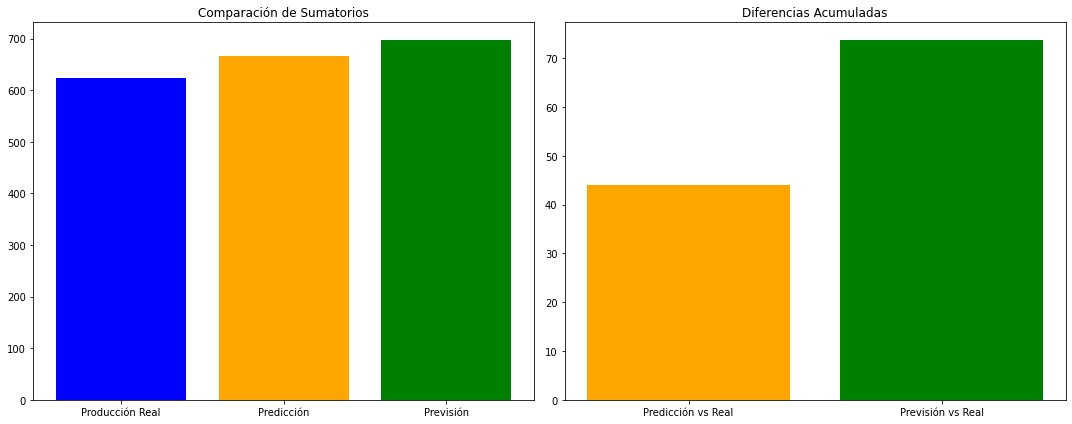

In [27]:
# Vamos a visualizar las comparaciones de los sumatorios y de las diferencias acumuladas

plt.figure(figsize=(15, 6))

# Gráfico para el sumatorio

plt.subplot(1, 2, 1)
plt.bar(['Producción Real', 'Predicción', 'Previsión'], [suma_e_simel, sumas_totales_predicciones, sumas_previsiones], color=['blue', 'orange', 'green'])
plt.title('Comparación de Sumatorios')

# Gráfico para las diferencias acumuladas
plt.subplot(1, 2, 2)
plt.bar(['Predicción vs Real', 'Previsión vs Real'], [diferencia_prediccion_vs_produccion_real, diferencia_prevision_vs_produccion_real], color=['orange', 'green'])
plt.title('Diferencias Acumuladas')

plt.tight_layout()
plt.show()


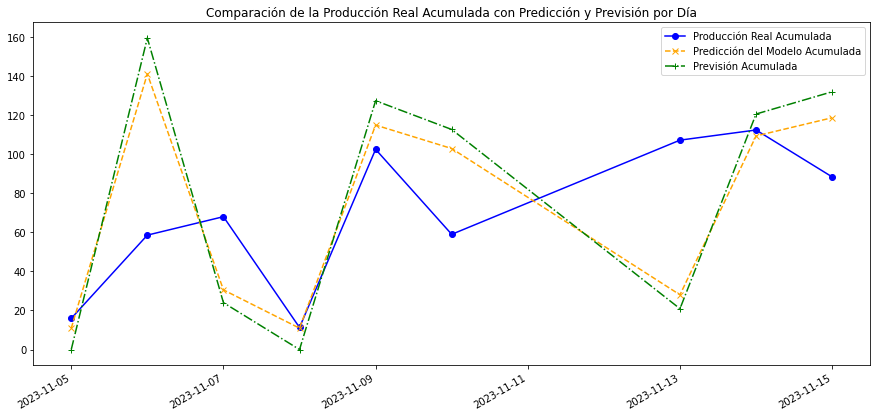

In [28]:
# Visualizamos otro gráfico con la evolución diaria de la predicción, previsión y producción real

# Agrupamos los datos por 'Fecha' y sumando los valores para 'E_SIMEL', 'Prediccion_E_SIMEL', y 'PREVISION'

df_agrupado_por_dia = df_predicciones_totales.groupby('Fecha').sum().reset_index()

# Configuración de la figura y el tamaño

plt.figure(figsize=(15, 7))

# Producción real

plt.plot(df_agrupado_por_dia['Fecha'], df_agrupado_por_dia['E_SIMEL'], label='Producción Real Acumulada', color='blue', marker='o')

# Predicción

plt.plot(df_agrupado_por_dia['Fecha'], df_agrupado_por_dia['Prediccion_E_SIMEL'], label='Predicción del Modelo Acumulada', color='orange', linestyle='--', marker='x')

# Previsión

plt.plot(df_agrupado_por_dia['Fecha'], df_agrupado_por_dia['PREVISION'], label='Previsión Acumulada', color='green', linestyle='-.', marker='+')

# Título y leyenda

plt.title('Comparación de la Producción Real Acumulada con Predicción y Previsión por Día')
plt.legend()

# Formato eje x

plt.gcf().autofmt_xdate()

# Mostramos el gráfico

plt.show()
